# Project1 - House Price Prediction

In [36]:
import numpy as np                                        # Numpy to carry out mathematical calculations
import pandas as pd                                       # Pandas to create and manipulate dataframe
import matplotlib.pyplot as plt                           # Matplotlib to plot the data points onto a graph
import seaborn as sns                                     # Seaborn to carry out statistical graphical functions 
import sklearn

### Loading Dataset

In [37]:
df=pd.read_csv('J:\Courses\Vihara tech (Internship)\Day 4 - Project 1 KT (July 15)\Regression_modeling using stats\Housing.csv')
df.head()                                        # To get top 5 rows from table

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [38]:
# Checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [39]:
# There are no null values

In [40]:
df.info()                                              # checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


### Convert the categorical data to numerical data (Map Method)

In [41]:
a = df.select_dtypes(exclude = 'object')               # to get numerical col.
a

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [42]:
b = df.select_dtypes(include = 'object')               # to get categorical/text col.
b

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,yes,no,no,no,yes,furnished
1,yes,no,no,no,yes,furnished
2,yes,no,yes,no,no,semi-furnished
3,yes,no,yes,no,yes,furnished
4,yes,yes,yes,no,yes,furnished
...,...,...,...,...,...,...
540,yes,no,yes,no,no,unfurnished
541,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,unfurnished
543,no,no,no,no,no,furnished


### Using Map method for conversion from categorical data to numerical data

In [43]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})                   # conversion from cat. data to numerical data
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,2


# EDA

## Univariate Analysis

In [44]:
# Univariate analysis is the simplest form of analyzing data. 
# “Uni” means “one”, so in other words our data has only one variable. 
# It doesn’t deal with causes or relationships and it’s major purpose is to describe. 
# It takes data, summarizes that data and finds patterns in the data.

In [45]:
# There are 2 types of Data, Categorical Data and Numerical Data
# For  Categorical Data, Countplot and Piechart are best suit
# For Numerical Data Boxplot and Distplot are best suit which gives proper distribution of Data

### Categorical Data

In [46]:
# Taking 2 plots for this analysis namely Countplot and Piechart
# Instead of creating plots for each columns, we can use for loop which will create all 2 plots for all categorical columns

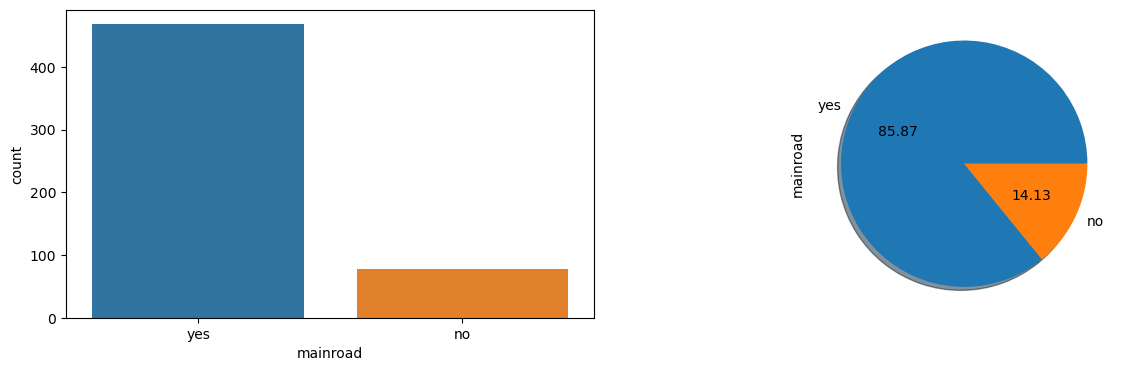

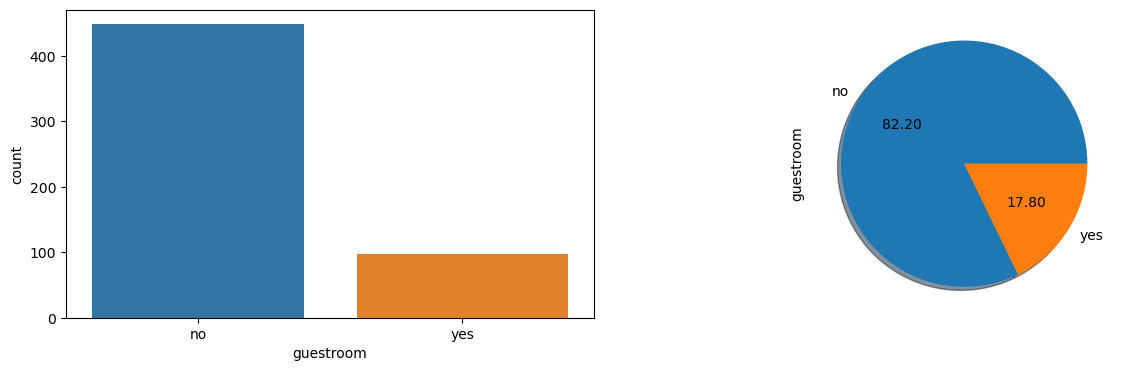

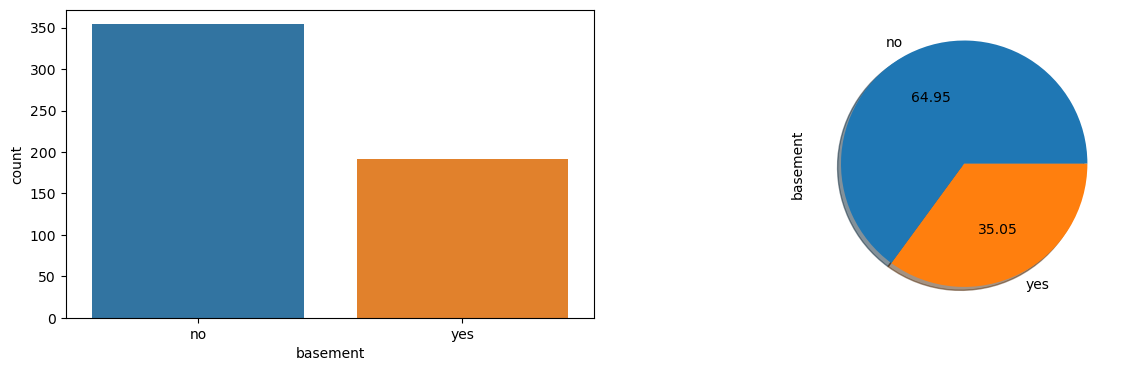

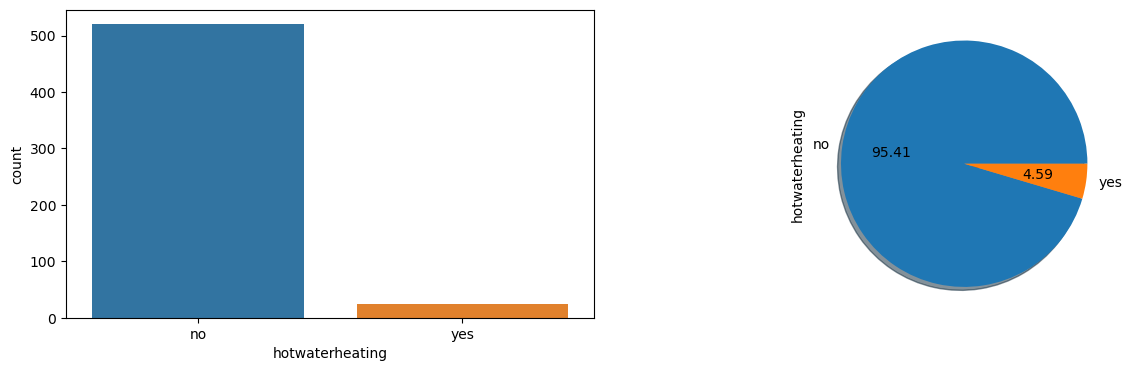

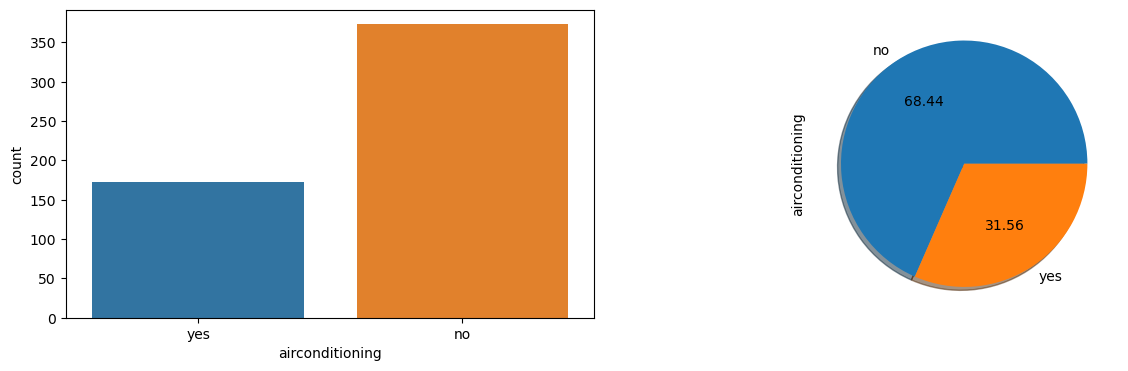

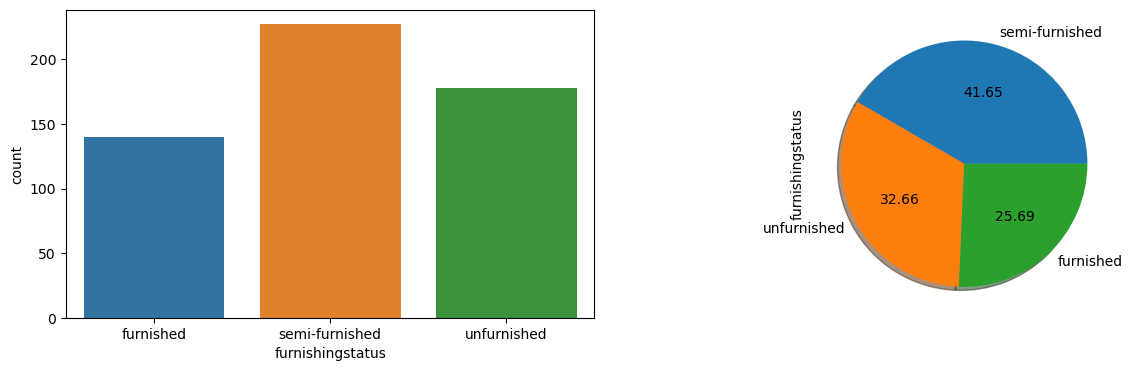

In [47]:
for col in b:
    plt.figure(figsize=(15,4))
        
    plt.subplot(121)
    sns.countplot(x = b[col])                                                               # countplot

    plt.subplot(122)
    b[col].value_counts().plot(kind='pie', autopct='%.2f', radius=1, shadow=True)           # piechart

    plt.show()

In [48]:
# Column 1: Countplot
# Col1 shows the Countplot which is used to plot for categorical data in general. We can see differences in categorical data in 
# dataset. We can know how many data has mainroad, how many doesn't like 400+ have mainroad and around 80 doesn't have mainroad.
# Similarly, can be checked for other categorical columns as well as shown in above plots.

# Column 2: Piechart
# Col2 shows the piechart which gives precise values in percentage. Like 85.87% data have mainroads and 14.13% data doesn't 
# have mainroad. Similarily, can be checked for all the columns as shown in above plots.

# We can observe that form above Countplat and Piechart data, 
# most of the ppl prefer mainroad and doesn't prefer guestroom, basement, hotwaterheating, airconditioning.
# most of the ppl prefer semi-furnished followed by unfurnished and furnished.

### Numerical Data

In [49]:
# Taking 2 plots for this analysis namely Boxplot Distplot
# Instead of creating plots for each columns, we can use for loop which will create all 2 plots for all numerical columns

In [50]:
import warnings
warnings.filterwarnings('ignore')

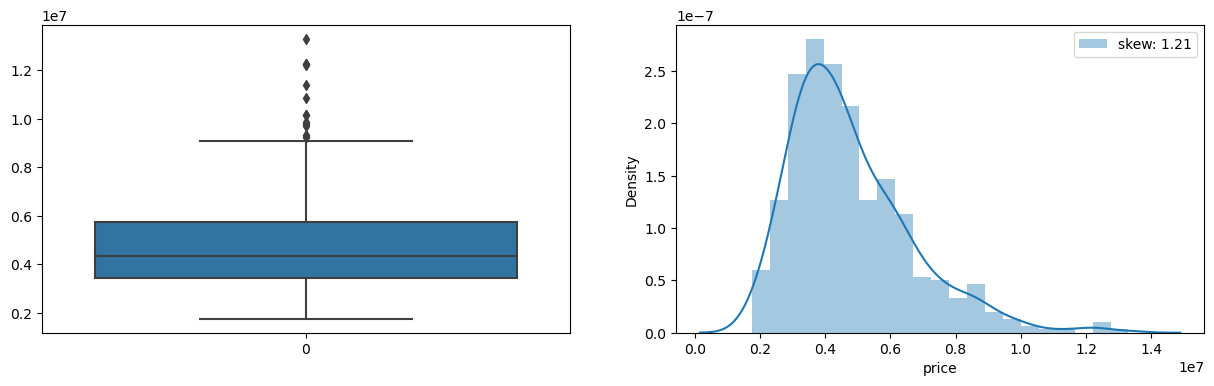

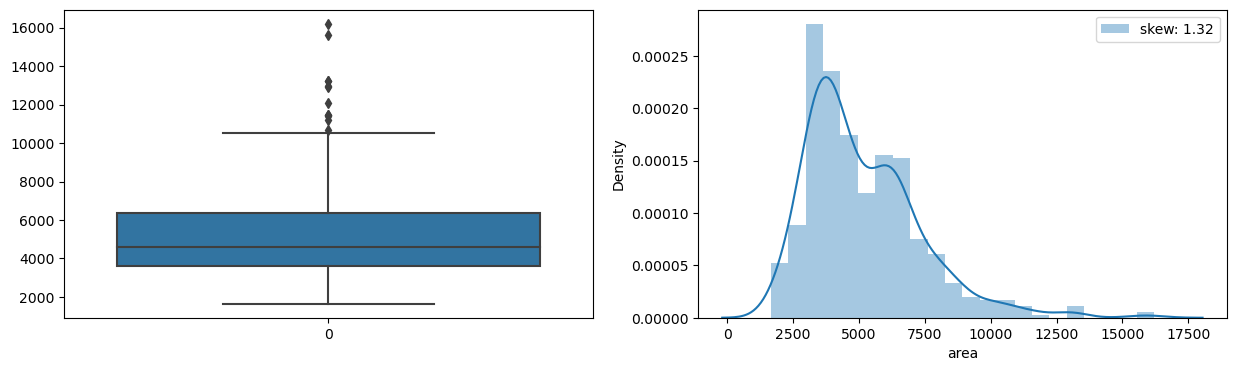

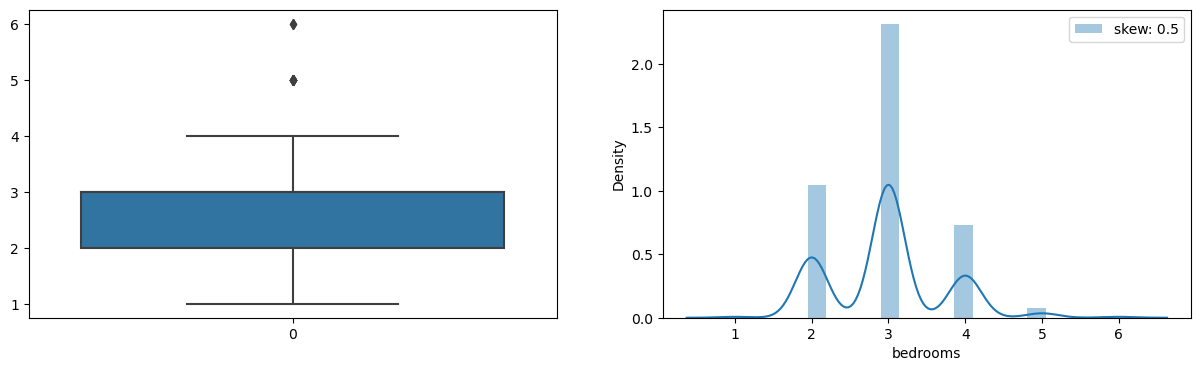

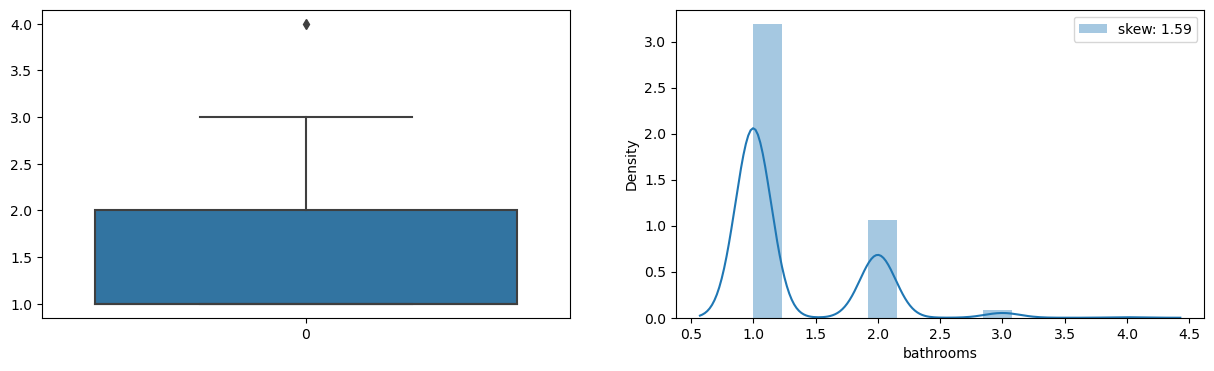

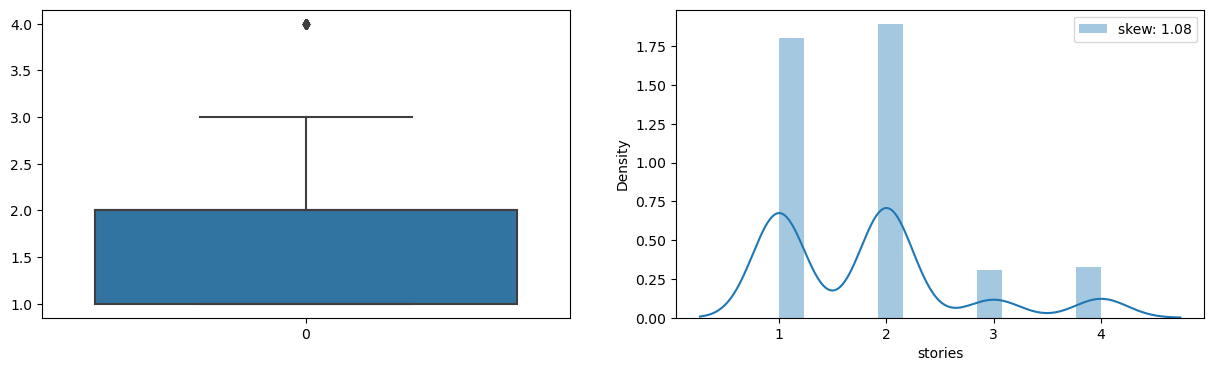

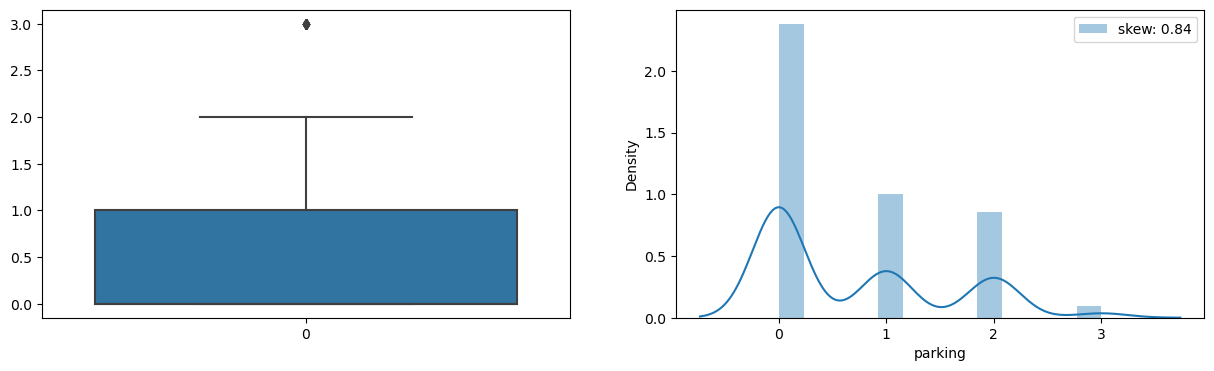

In [51]:
for col in a:
    plt.figure(figsize=(15,4))
    
    plt.subplot(121)
    sns.boxplot(a[col])                                                         # Boxplot: used to find outliers
    
    plt.subplot(122)
    sns.distplot(a[col], label="skew: " + str(np.round(a[col].skew(),2)))       # Distplot
    plt.legend()
    
    plt.show()

In [52]:
# Column 1: Boxplot
# We can see from above that outliers of all col. are there are hardly 1 outlier except price and area so we can ignore it. 
# Since, there are many outliers present in Price and area we need to handle handle it to increase it's accuracy and effeciency.

# Column 2: Distplot
# Other side of col, we can see distplot which is advanced version of Histogram which gives KDE(Kernell Density Estimator)
# along with graph which estimate the probability density function of a random variable.

In [53]:
df.describe()  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


## Bivariate Analysis

In [54]:
# Bivariate analysis is a statistical method examining how two different things are related. 
# The bivariate analysis aims to determine if there is a statistical link between the two variables. 
# and, if so, how strong and in which direction that link is.

In [55]:
# price vs area (num-num)
# price vs bedrooms (num-num)
# price vs stories (num-num)
# price vs parking (num-num)
# price vs furnishing status (num-cat)

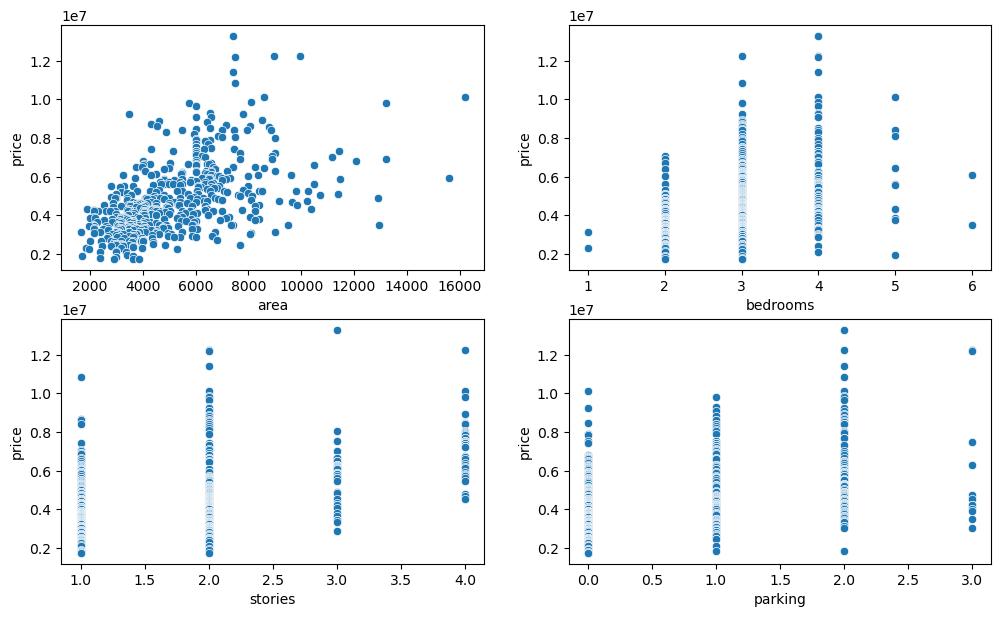

In [56]:
# Scatterplot (Num-Num)

plt.figure(figsize=(12,7))
plt.subplot(221)
sns.scatterplot(x = df["area"], y = df["price"])

plt.subplot(222)
sns.scatterplot(x = df["bedrooms"], y = df["price"])

plt.subplot(223)
sns.scatterplot(x = df["stories"], y = df["price"])

plt.subplot(224)
sns.scatterplot(x = df["parking"], y = df["price"])

plt.show()

In [57]:
# A scatter plot uses dots to represent values for two different numeric variables

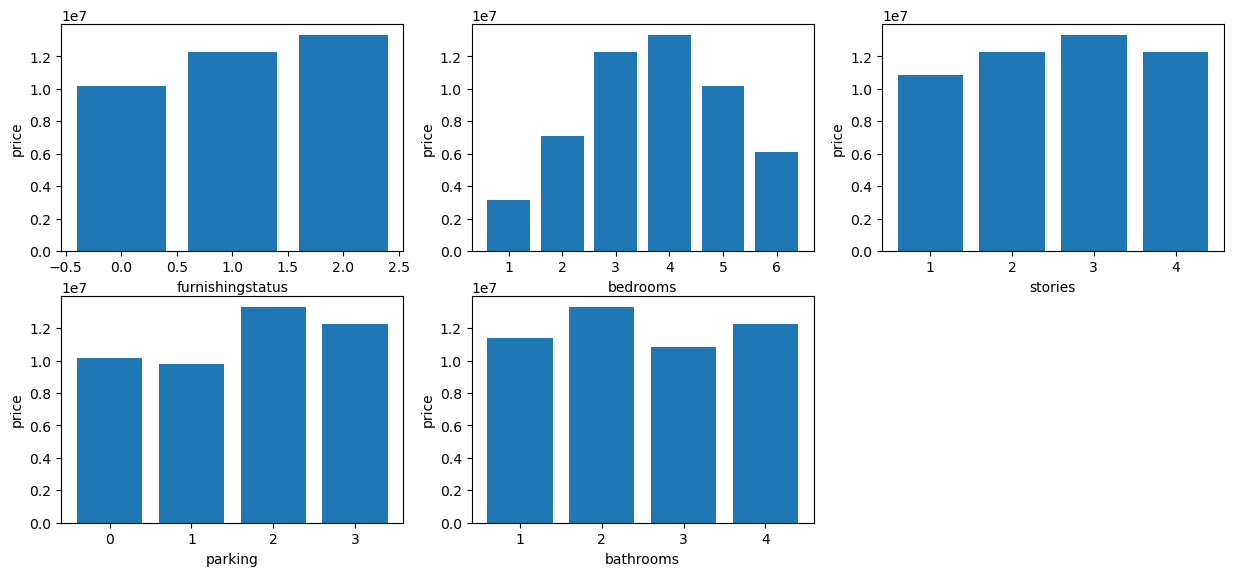

In [58]:
# Barchart

plt.figure(figsize=(15,10))
plt.subplot(331)
plt.bar(df['furnishingstatus'], df['price'])
plt.xlabel('furnishingstatus')
plt.ylabel('price')

plt.subplot(332)
plt.bar(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.subplot(333)
plt.bar(df['stories'], df['price'])
plt.xlabel('stories')
plt.ylabel('price')

plt.subplot(334)
plt.bar(df['parking'], df['price'])
plt.xlabel('parking')
plt.ylabel('price')

plt.subplot(335)
plt.bar(df['bathrooms'], df['price'])
plt.xlabel('bathrooms')
plt.ylabel('price')

plt.show()

In [59]:
# Purpose of a bar graph is to convey relational information quickly in a visual manner
# We can see relationship between price and other variables,
# Price is more if house is furnished
# Price is more for 4BHK
# Price is more for 3 stories
# Price is more for 2 parking
# Price is more for 2 bathrooms

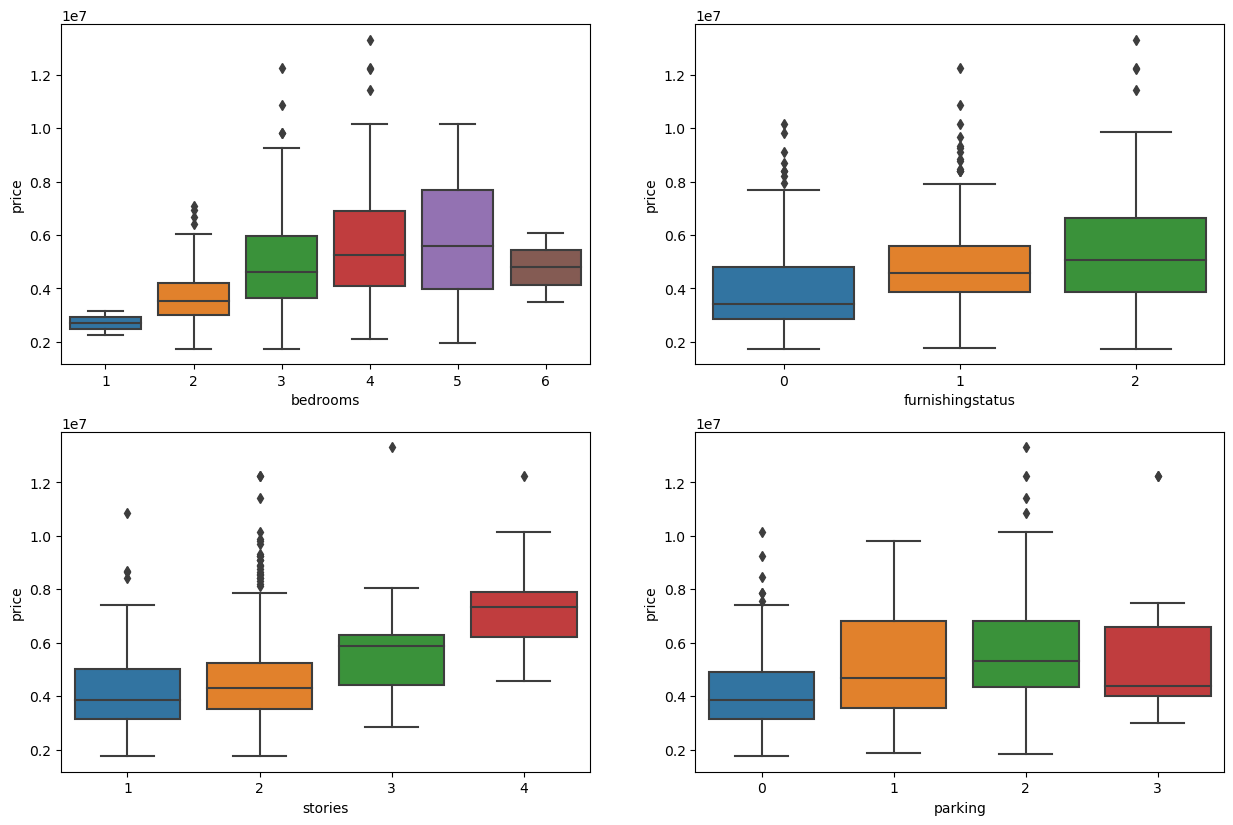

In [60]:
# Boxplot

plt.figure(figsize=(15,15))
plt.subplot(321)
sns.boxplot(x= df['bedrooms'], y=df['price'])

plt.subplot(322)
sns.boxplot(x=df['furnishingstatus'], y=df['price'])

plt.subplot(323)
sns.boxplot(x=df['stories'], y=df['price'])

plt.subplot(324)
sns.boxplot(x=df['parking'], y=df['price'])

plt.show()

In [61]:
# Boxplots can be used between two variables and see following observations:
# If bedrooms increases then price increases except for 6BHK
# If house is furnished the it's costing more
# If stories increases then price also increases
# If parking increases then price also increases except 3 parkings

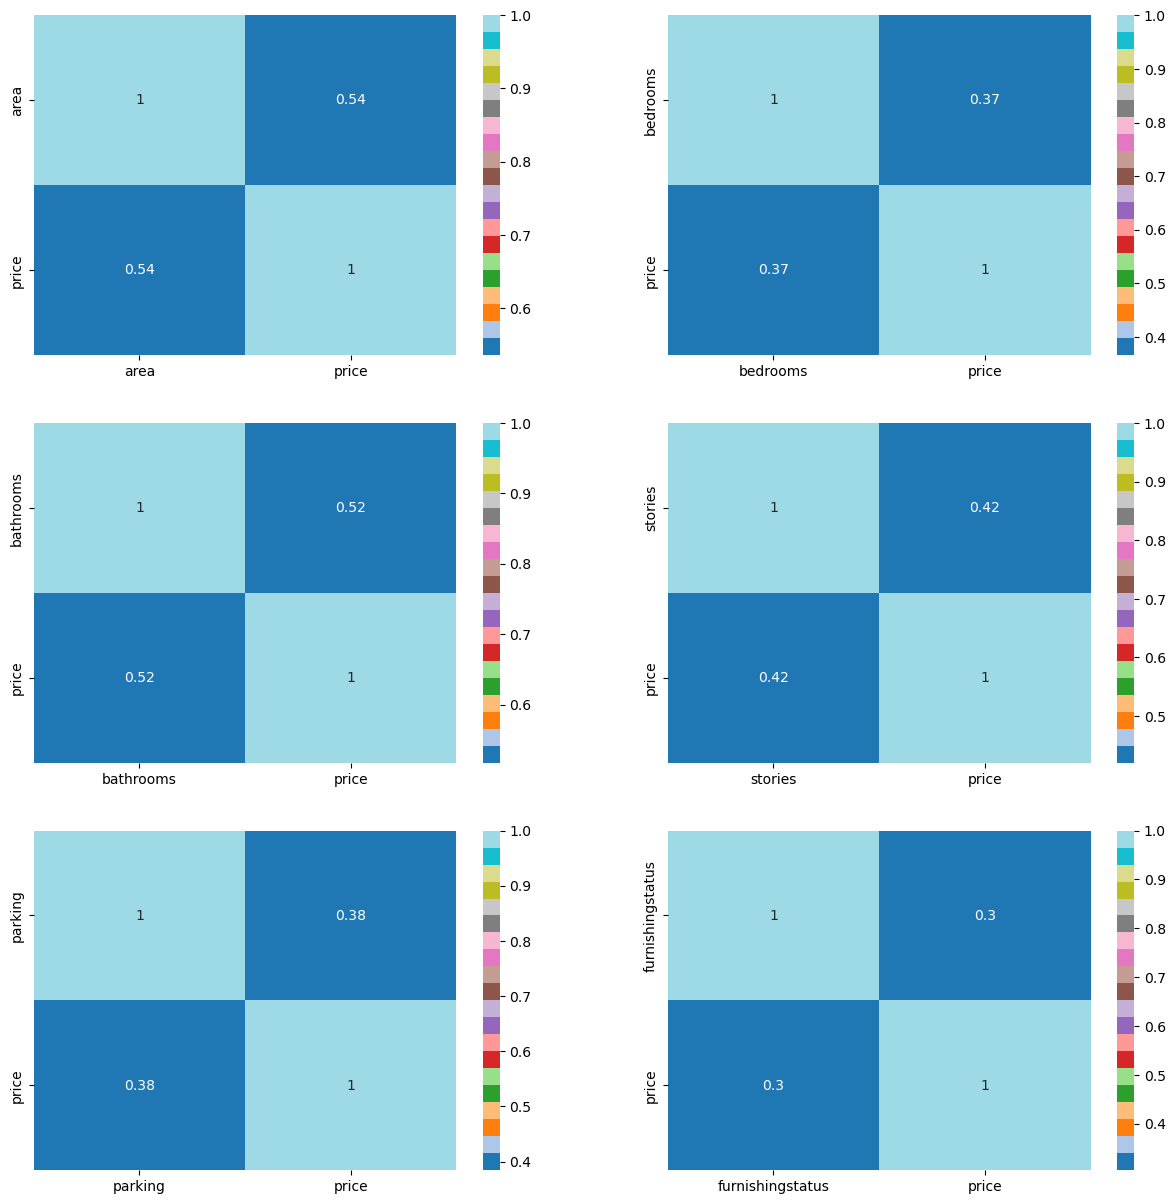

In [62]:
# Heatmap (Corelation) (cat-cat)                        # for two columns

plt.figure(figsize=(15,15))
plt.subplot(321)
sns.heatmap(data=df[["area", "price"]].corr(method="pearson"), annot=True, cmap = 'tab20')              # Pearson Correlation

plt.subplot(322)
sns.heatmap(data=df[["bedrooms", "price"]].corr(method="pearson"), annot=True, cmap = 'tab20')  

plt.subplot(323)
sns.heatmap(data=df[["bathrooms", "price"]].corr(method="pearson"), annot=True, cmap = 'tab20')

plt.subplot(324)
sns.heatmap(data=df[["stories", "price"]].corr(method="pearson"), annot=True, cmap = 'tab20')

plt.subplot(325)
sns.heatmap(data=df[["parking", "price"]].corr(method="pearson"), annot=True, cmap = 'tab20')

plt.subplot(326)
sns.heatmap(data=df[["furnishingstatus", "price"]].corr(method="pearson"), annot=True, cmap = 'tab20')

plt.show()

In [63]:
# Correlation was found for two variables:
# All 6 correlation which was found is positively correlated 

In [64]:
p = df.groupby('bedrooms').mean()['price']
q = df.groupby('furnishingstatus').mean()['price']
r = df.groupby('bathrooms').mean()['price']
s = df.groupby('stories').mean()['price']
p, q, r, s

(bedrooms
 1    2.712500e+06
 2    3.632022e+06
 3    4.954598e+06
 4    5.729758e+06
 5    5.819800e+06
 6    4.791500e+06
 Name: price, dtype: float64,
 furnishingstatus
 0    4.013831e+06
 1    4.907524e+06
 2    5.495696e+06
 Name: price, dtype: float64,
 bathrooms
 1    4.206913e+06
 2    6.209206e+06
 3    7.282100e+06
 4    1.225000e+07
 Name: price, dtype: float64,
 stories
 1    4.170659e+06
 2    4.764074e+06
 3    5.685436e+06
 4    7.208450e+06
 Name: price, dtype: float64)

## Multivariate Analysis

In [65]:
# Multivariate analysis involves evaluating multiple variables (more than two) to identify any possible association among them

In [66]:
# price vs area vs bedroom vs furnishing status
# price vs area vs bedroom vs stories
# price vs area vs stories vs parking

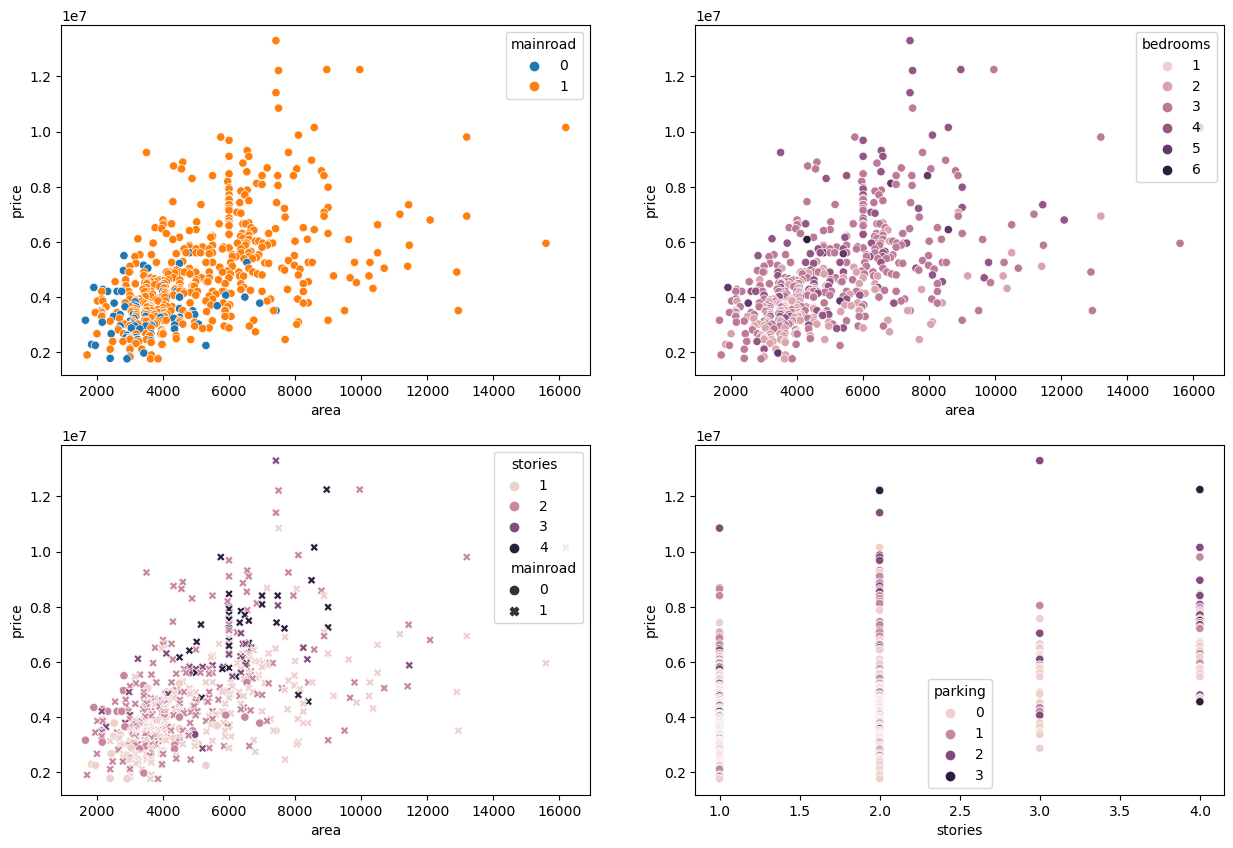

In [67]:
# Scatterplot

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.scatterplot(x = df["area"], y = df["price"], hue=df['mainroad'])

plt.subplot(222)
sns.scatterplot(x = df["area"], y = df["price"], hue=df['bedrooms'])

plt.subplot(223)
sns.scatterplot(x = df["area"], y = df["price"], hue=df['stories'], style=df['mainroad'])

plt.subplot(224)
sns.scatterplot(x = df["stories"], y = df["price"], hue=df['parking'])

plt.show()

In [68]:
# Using scatter plot we can see relationship between more than 3 variables,
# While comparing price and area, we can see how many have mainroad which is in orange color and how many doesn't in blue.
# similarly, we can see for bedrooms, area and stories which us indicated in different colors.

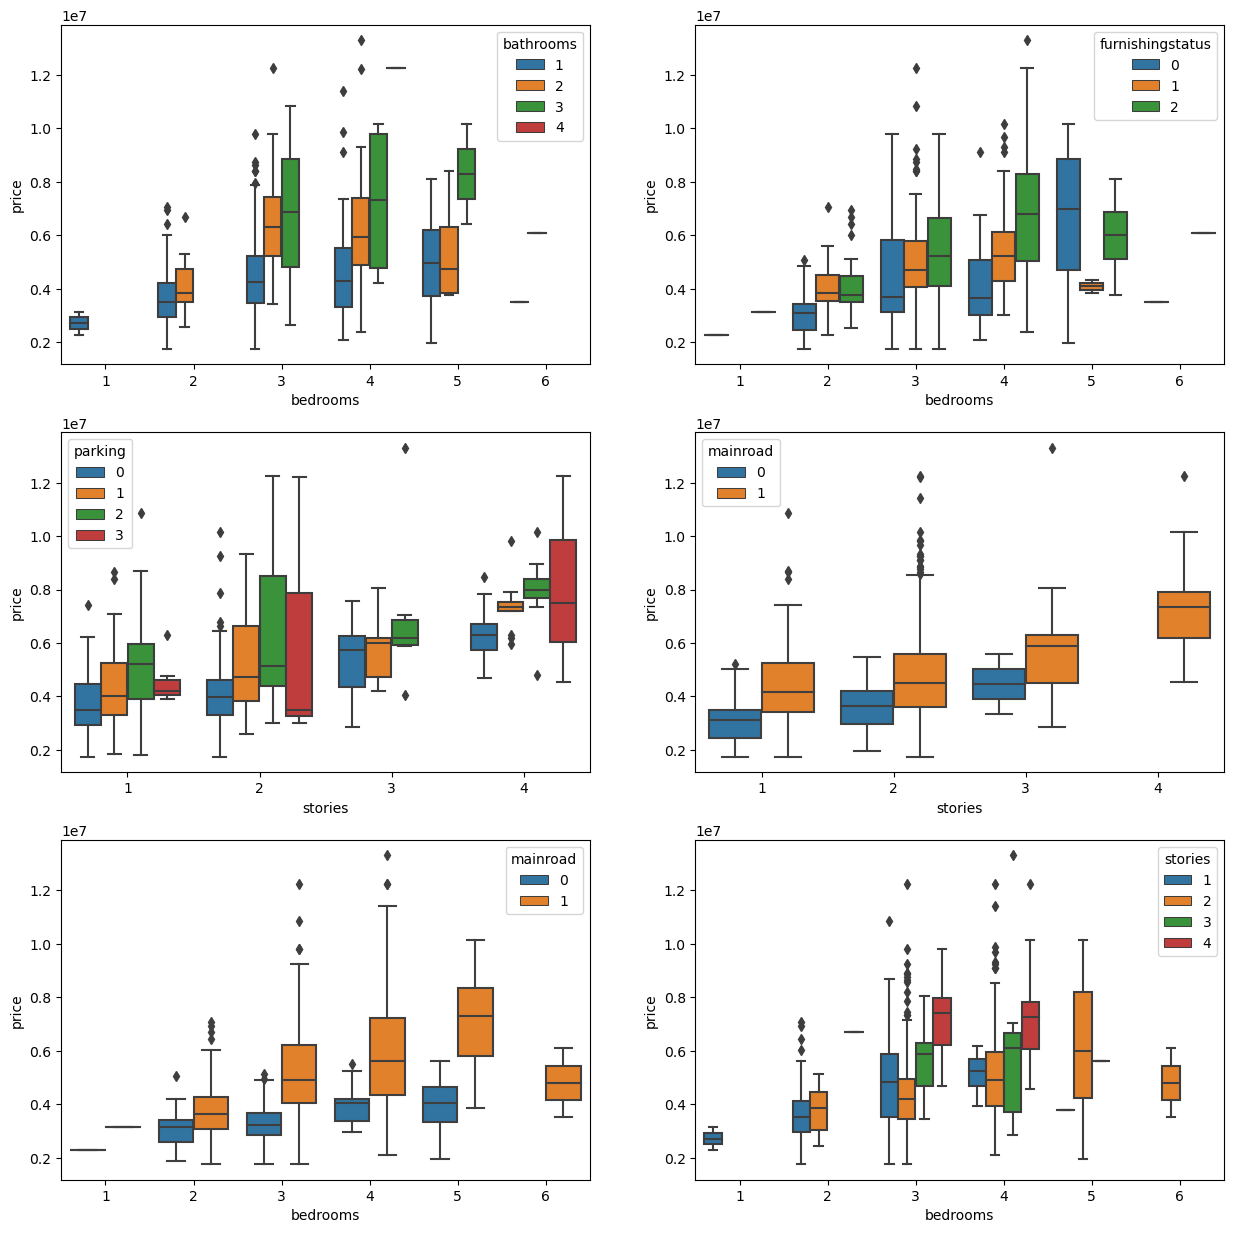

In [69]:
# Boxplot

plt.figure(figsize=(15,15))
plt.subplot(321)
sns.boxplot(x= df['bedrooms'], y=df['price'], hue=df['bathrooms'])

plt.subplot(322)
sns.boxplot(x=df['bedrooms'], y=df['price'], hue=df['furnishingstatus'])

plt.subplot(323)
sns.boxplot(x=df['stories'], y=df['price'], hue=df['parking'])

plt.subplot(324)
sns.boxplot(x=df['stories'], y=df['price'], hue=df['mainroad'])

plt.subplot(325)
sns.boxplot(x=df['bedrooms'], y=df['price'], hue=df['mainroad'])

plt.subplot(326)
sns.boxplot(x=df['bedrooms'], y=df['price'], hue=df['stories'])

plt.show()

In [70]:
# We can observe following observations from Boxplot for more than 2 variables,
# For 3 bathrooms 4BHK price is more, for 2 bathrooms 3 & 4BHK prices are more and for 1 bathroom 5BHK price is more.
# If house is not furnished then 5BHK price is high, if semi-furnished then 4BHK and if furnished then 4BHK price is high.
# Price are high for 4stories 3parking followed by 4stories 2parking, 4stories 1parking and 4stories no parking.
# Price depends on stories and mainroad, more the stories high the price and mainroad is included in it.
# Price depends on bedrooms and mainroad, if there is mainroad then price is high depending on stories.
# Price is high if stories and bedrooms are more.

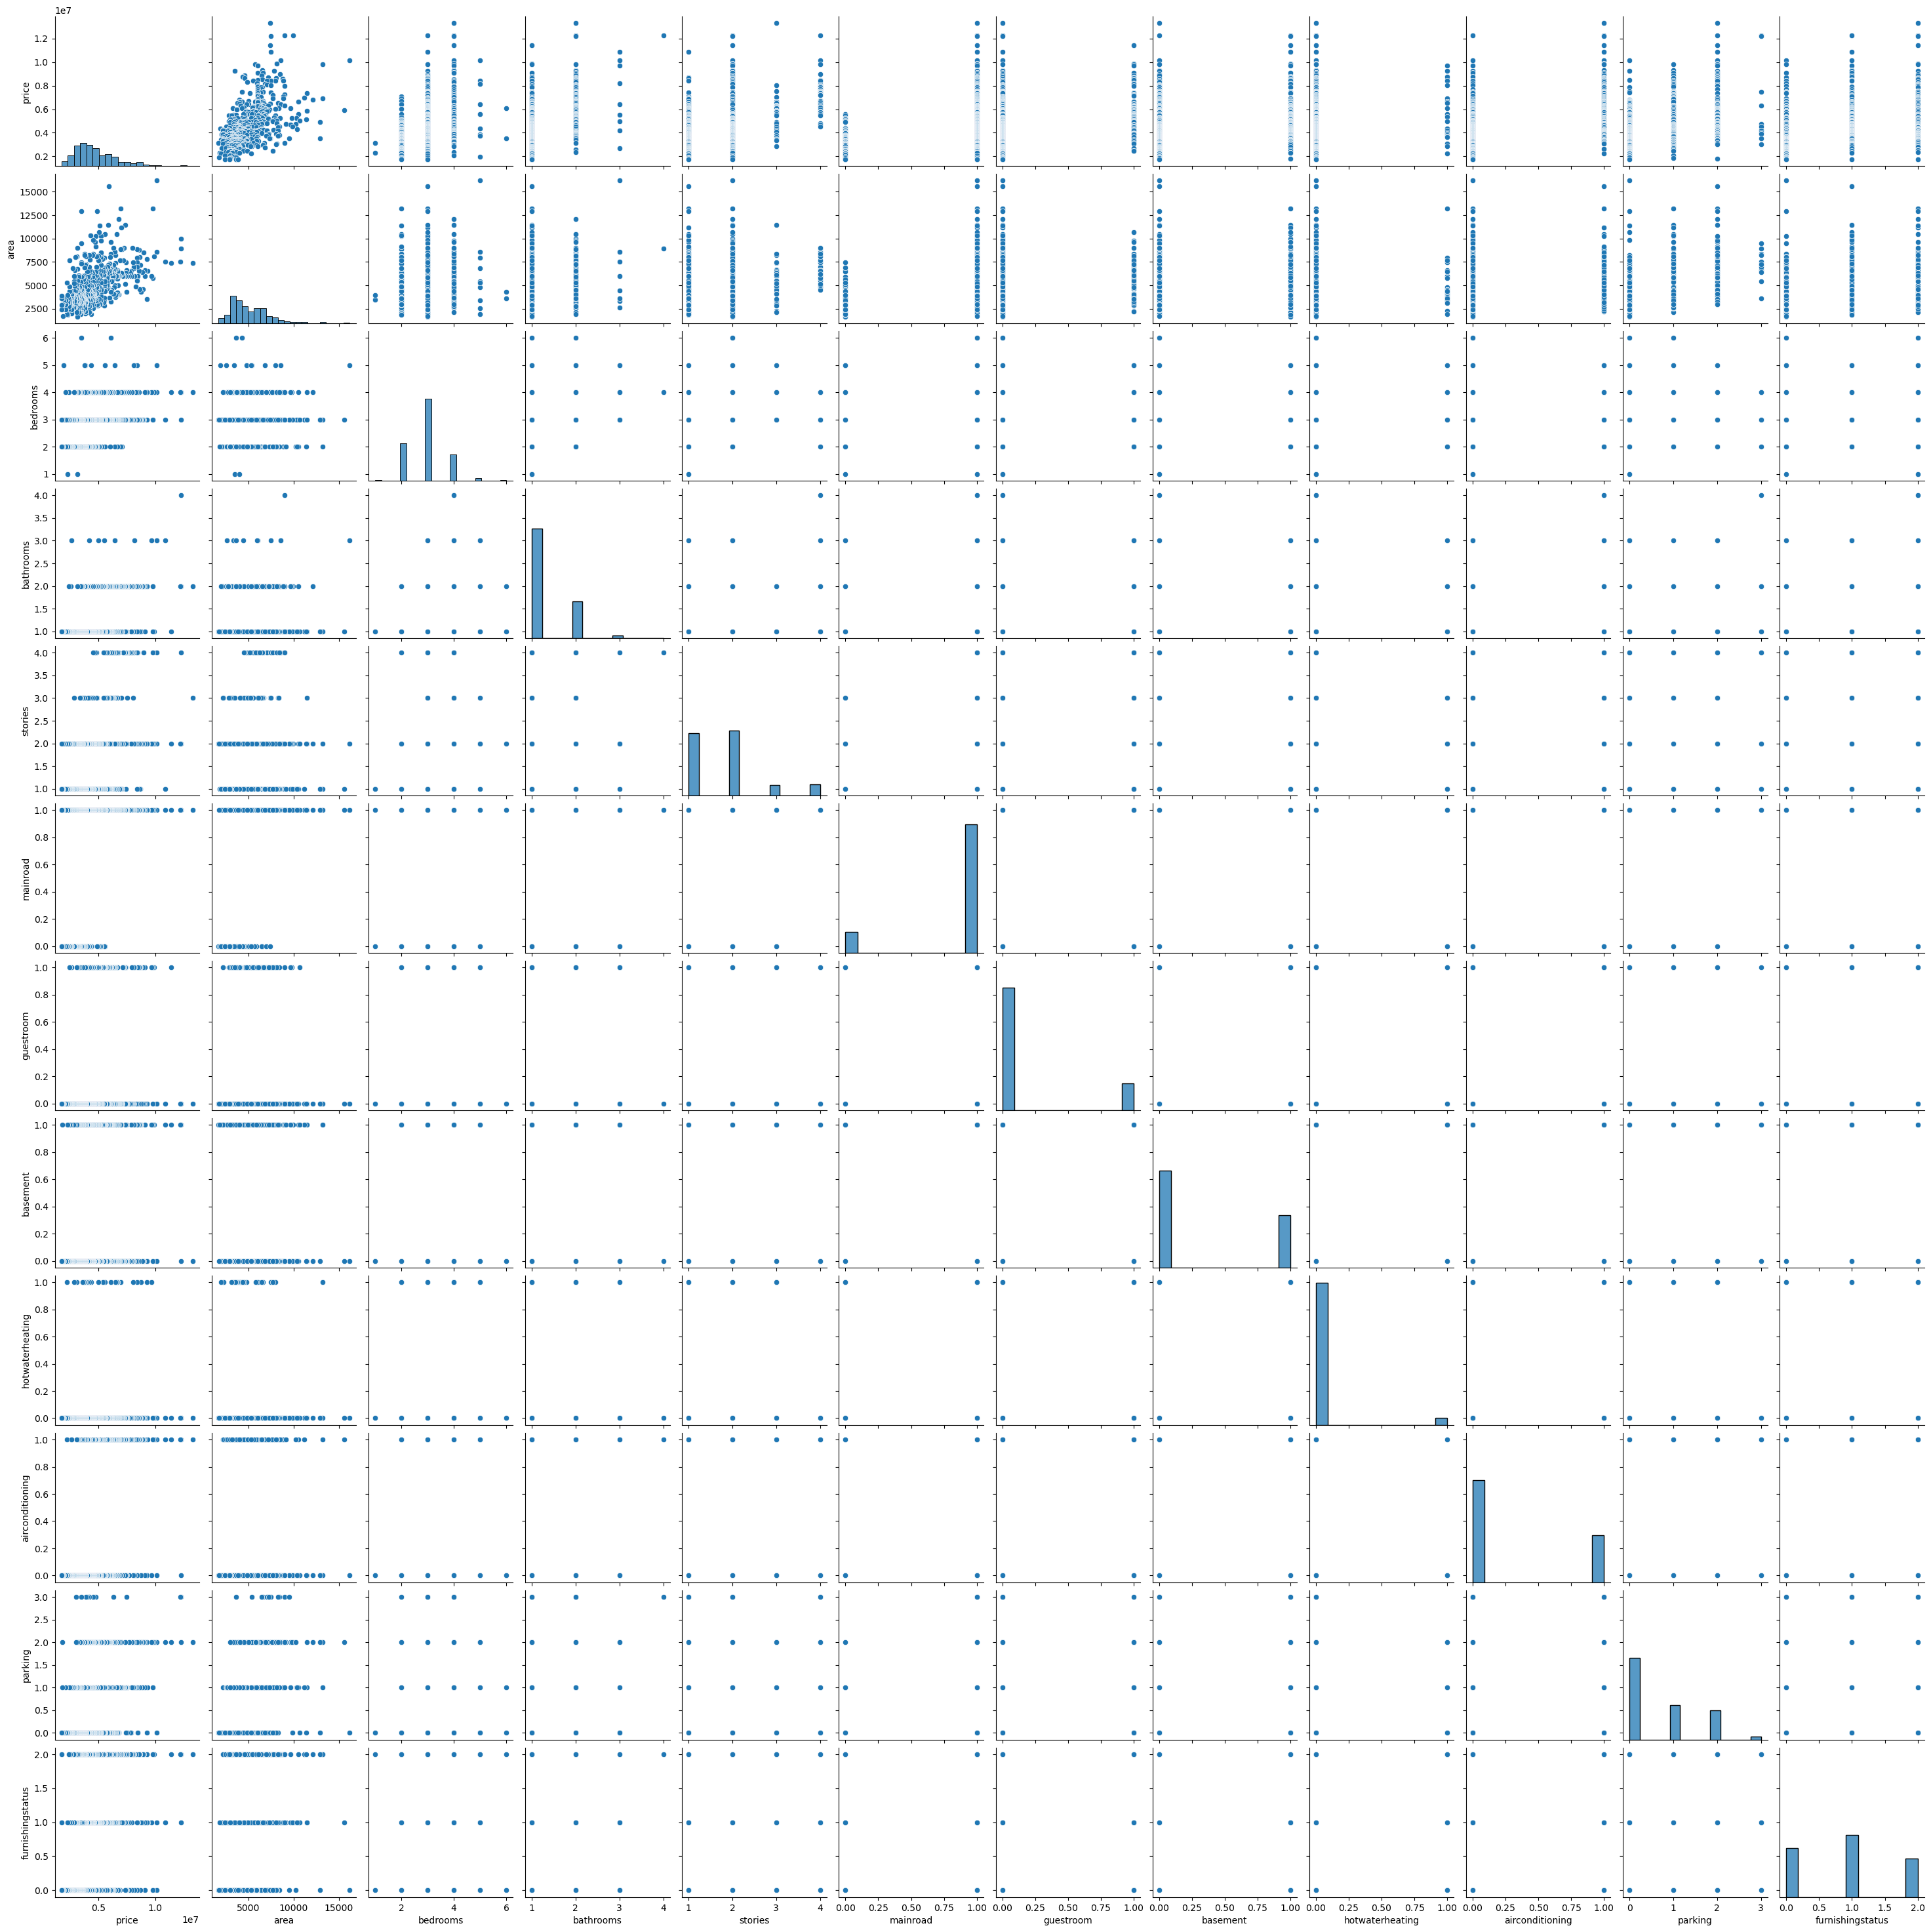

In [71]:
# Pairplot: takes only numerical columns from the table and do scatter plot
# with same col, it will do histogram and relation with other col will be scatter plot

sns.pairplot(df)                       # Visualize each numerical columns (including conversion from cat to num)

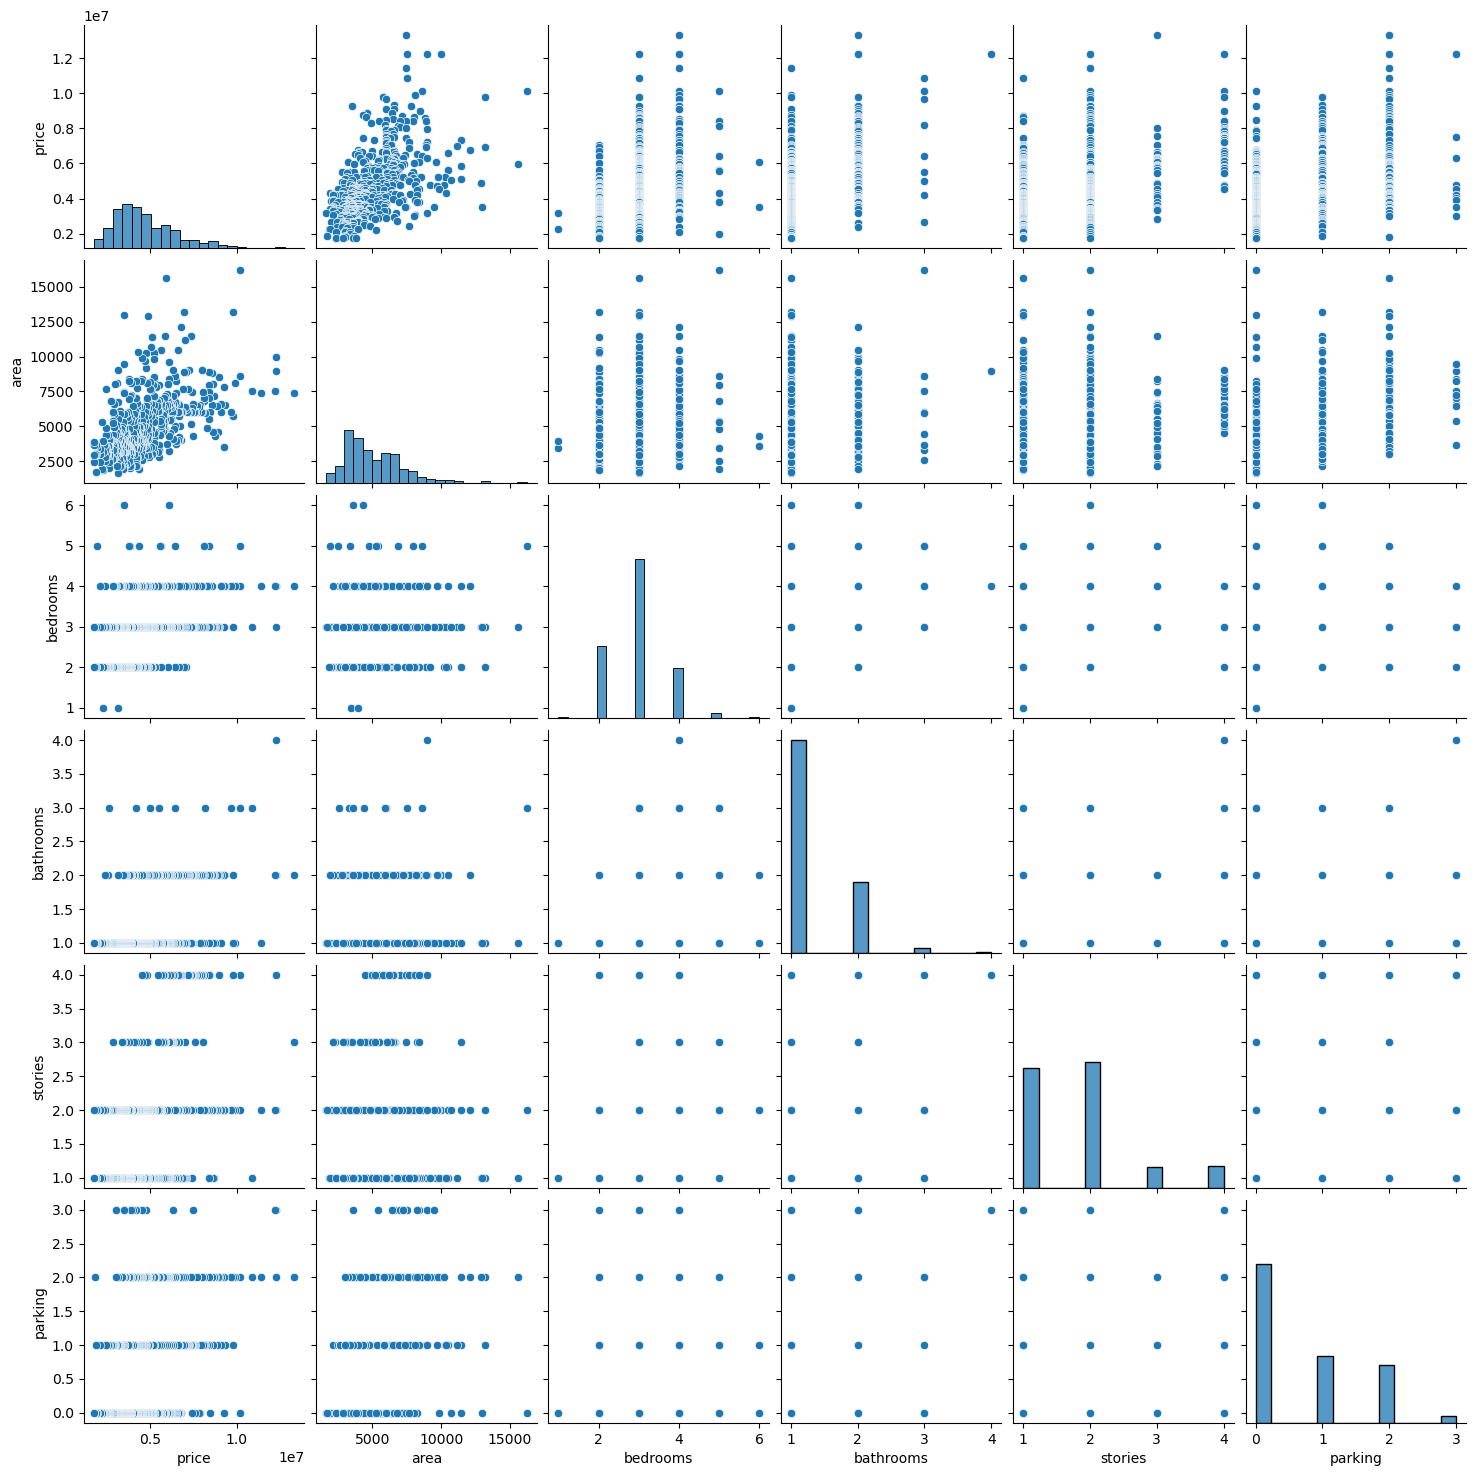

In [72]:
sns.pairplot(a)                       # Visualize all numerical columns (excluding conversion of Data from cat to num)

In [73]:
# Pairplot
# with same col it's histogram and relation with other col it's scatter plot for all numerical data

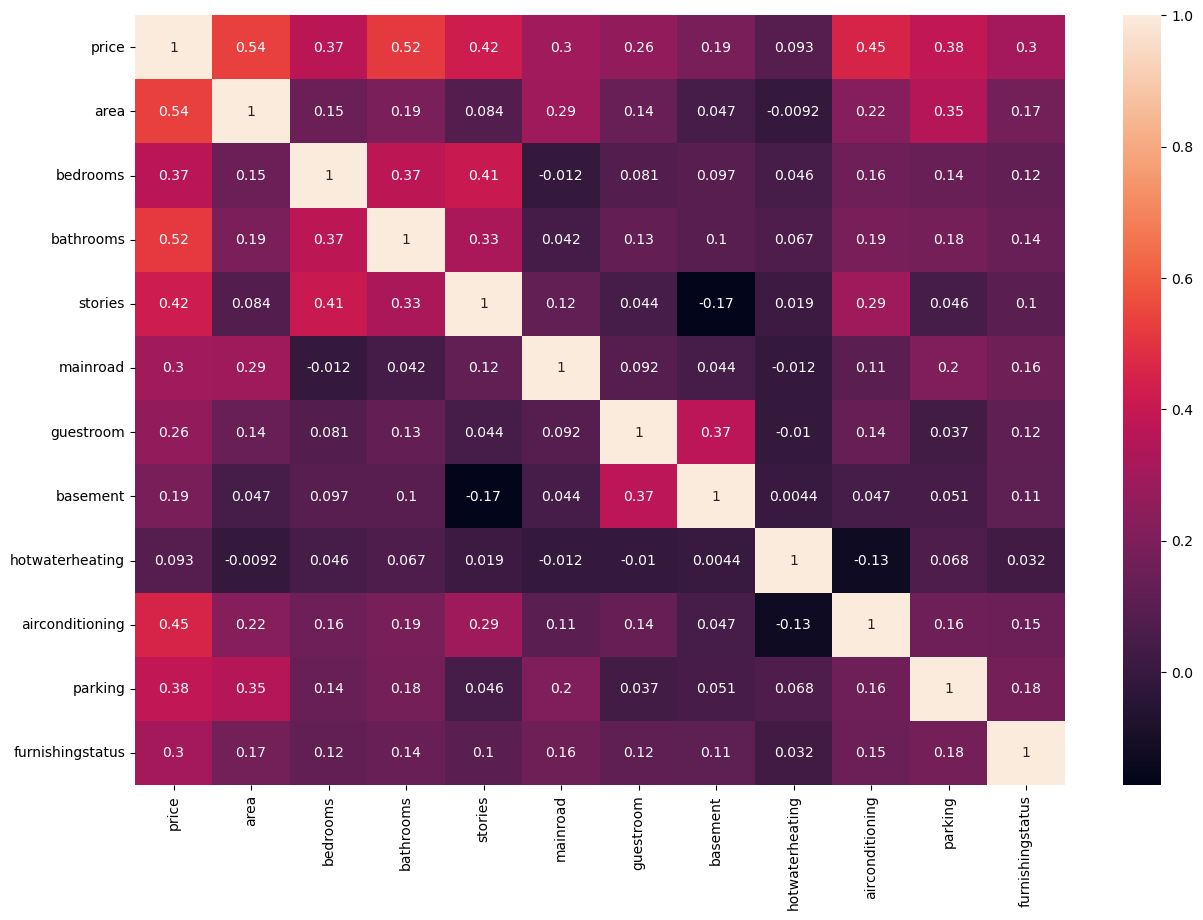

In [74]:
# Heatmap of all col (Corelation)
# Heatmap is used to find correlation between the variables

plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(method="pearson"), annot=True)                      # Pearson Correlation
plt.show()

In [75]:
# We can see from above heatmap, no feature/col has highly positive or neagtive correlated so all col. are equally important. 

## Without Handling Outliers 

In [76]:
# Split the data

# Give independent data to x & dependent data to y
x = df.drop(['price'],axis=1)                 # independent 
y = df['price']                               # dependent

In [77]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size indicates percentage of values for test i.e, 20% Data = Test & 80% Data = Train

In [79]:
len(X_train) , len(y_train)                   # 80% Random Data selected for train

(436, 436)

In [80]:
len(X_test) , len(y_test)                     # 20% Random Data selected for test

(109, 109)

In [81]:
# Give data to the model

# Now, giving training data to train the algorithm
from sklearn.linear_model import LinearRegression

In [82]:
reg = LinearRegression()

In [83]:
reg.fit(X_train , y_train)                    # fit is mediator, gives train data to reg (algorithm: y=mx+c)

LinearRegression()

In [84]:
# m values                                    # slope
reg.coef_

array([2.52680728e+02, 9.95843362e+04, 1.05808574e+06, 4.02470774e+05,
       4.92839898e+05, 2.79380908e+05, 4.89623106e+05, 6.32878381e+05,
       7.90165893e+05, 2.28904460e+05, 2.16730187e+05])

In [85]:
# c value                                     # intercept 
reg.intercept_

-230801.09015681501

In [86]:
# Train accuracy and Train loss

y_train_pred = reg.predict(X_train)

In [87]:
from sklearn.metrics import r2_score           #r2_score = used to find accuracy of the model

In [88]:
# find accuracy of train_data
print(f'train accuracy : {r2_score(y_train,y_train_pred)}')

train accuracy : 0.6652807320087133


In [89]:
# find loss of train_data
# Formula: loss = 1 - accuracy
print(f'train loss : {1-r2_score(y_train,y_train_pred)}')

train loss : 0.3347192679912867


In [90]:
# Test accuracy and Test loss

y_test_pred = reg.predict(X_test)

In [91]:
# find accuracy of test_data
print(f'test accuracy : {r2_score(y_test,y_test_pred)}')

test accuracy : 0.6334513682813152


In [92]:
# find loss of test_data
print(f'test loss : {1-r2_score(y_test,y_test_pred)}')

test loss : 0.3665486317186848


In [93]:
# Prediction with own data

X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [94]:
print('The price is',reg.predict([[7000 , 5 , 3 , 1 , 1, 1, 0, 0, 1, 1, 1]]))

The price is [7620635.02407611]


## Caping using IQR method (Handling Outliers)

In [95]:
# We can see from Boxplot that there are outliers in many columns but only in Price and area col there are more outliers
# So, we need to handle outliers so as to increase accuracy of the model.
# capping technique is used to handle the outliers

In [96]:
df_cap = df.copy()

In [97]:
def iqr_capping(df, cols, factor):             # handing the outliers
    for col in cols: 
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - (factor * iqr)
        upper_limit = q3 + (factor * iqr)
        
        df[col] = np.where(df[col]>upper_limit, upper_limit, 
                 np.where(df[col]<lower_limit, lower_limit, df[col])) 

In [98]:
features = ['price', 'area']

In [99]:
iqr_capping(df_cap, features, 1.5)

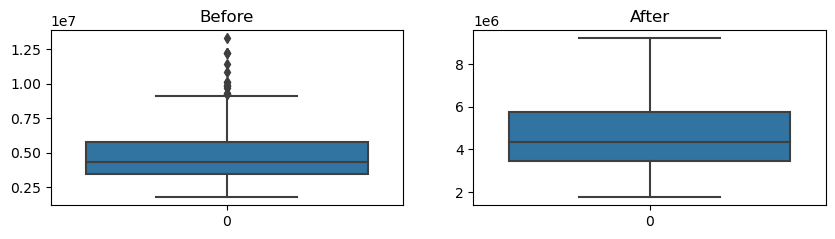

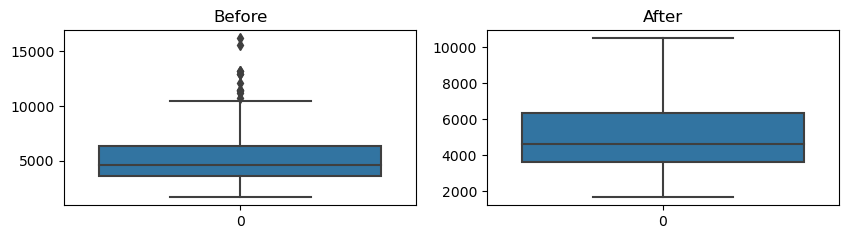

In [100]:
for col in features:
    plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(222)
    sns.boxplot(df_cap[col])
    plt.title('After')
    
    plt.show()    
    
# price and area respectively

### Split the data

In [101]:
# Give independent data to x & dependent data to y                              
x = df_cap.drop(['price'],axis=1)               # independent
y = df_cap['price']                             # dependent

In [102]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size indicates percentage of values for test i.e, 20% Data = Test & 80% Data = Train

In [104]:
len(X_train) , len(y_train)                   # 80% Random Data selected for train

(436, 436)

In [105]:
len(X_test) , len(y_test)                     # 20% Random Data selected for test

(109, 109)

### Give the data to the model

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
reg = LinearRegression()

In [108]:
reg.fit(X_train , y_train)

LinearRegression()

In [109]:
# m values                       # slope
reg.coef_

array([2.73461262e+02, 1.02972508e+05, 9.44416088e+05, 3.99332730e+05,
       4.91397509e+05, 2.71268056e+05, 4.63930793e+05, 6.92725194e+05,
       7.43934439e+05, 1.76134984e+05, 2.02430873e+05])

In [110]:
# c value                        # intersect
reg.intercept_

-137720.08604855184

### Train accuracy and Train loss

In [111]:
y_train_pred = reg.predict(X_train)

In [112]:
from sklearn.metrics import r2_score     #r2_score = used to find accuracy of the model

In [113]:
# find accuracy of train_data
print(f'train accuracy : {r2_score(y_train,y_train_pred)}')

train accuracy : 0.6703265786548698


In [114]:
# find loss of train_data
# Formula: loss = 1 - accuracy
print(f'train loss : {1-r2_score(y_train,y_train_pred)}')

train loss : 0.3296734213451302


### Test accuracy and Test loss

In [115]:
y_test_pred = reg.predict(X_test)

In [116]:
# find accuracy of test_data
print(f'test accuracy : {r2_score(y_test,y_test_pred)}')

test accuracy : 0.668128995980866


In [117]:
# find loss of test_data
print(f'test loss : {1-r2_score(y_test,y_test_pred)}')

test loss : 0.33187100401913405


### Prediction with own data

In [118]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [119]:
print('The price is',reg.predict([[7000 , 5 , 3 , 1 , 1, 1, 0, 0, 1, 1, 1]]))

The price is [7409118.14925463]


In [120]:
# We can observe after and before handling outliers, before handling test accuracy was 63% and after handling it's 66%.
# So, handling outliers has some impact in accuracy which is important for a model to be more precise.

In [121]:
# Ref
# https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
# https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
# https://www.youtube.com/watch?v=4HyTlbHUKSw&t=532s
# https://www.youtube.com/watch?v=6D3VtEfCw7w&t=1113s